# Radio-Frequency Modulation and Bessel Functions

This example demonstrates the basic use of modulators and amplitude detectors for detecting specific frequency components of the light field.

## The Optical Configuration

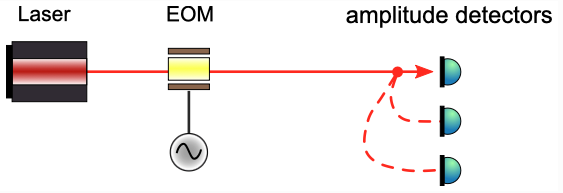

The optical layout simply consists of a laser, an electro-optical **Modulator** (EOM) and three **AmplitudeDetector**s. Note that all three detectors are connected to the same node and thus probe the same field amplitude.

## The FINESSE Model

In [1]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Laser with power 1W
    laser L0 P=1
    s s0 L0.p1 eom1.p1

    # Phase modulator at 40kHz, with a modulation index of 0.05
    mod eom1 f=40k midx=.05 order=5 mod_type=pm

    # Three amplitude detectors, looking at the first three positive modulation
    # sidebands
    ad bessel1 eom1.p2.o f=40k
    ad bessel2 eom1.p2.o f=80k
    ad bessel3 eom1.p2.o f=120k

    # Sweep the modulation index of the modulator from 0 to 10
    xaxis(eom1.midx, lin, 0, 10, 300)
    """
)

A laser beam is passed through an electro-optical modulator (EOM) which applies a phase modulation with a frequency of 40 kHz and a modulation index of 0.05. The modulator is set such that up to five orders or sidebands will be created (at plus/ minus 40, 80, 120, 160, 200 kHz respectively). The modulated beam is then detected with three amplitude detectors, each of which is set to a particular frequency. This means, for example, that the detector **bessel2** can only 'see' the sideband at +80 kHz and no other part of the beam.

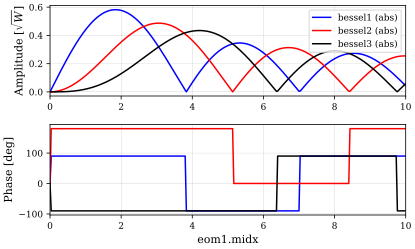

In [2]:
out = kat.run()
out.plot();

Phase modulation (with up to five higher harmonics) is applied to a laser beam and amplitude detectors are used to measure the field at the first three harmonics. The three traces show the amplitude of the single sidebands at 40 kHz, 80 kHz, and 120 kHz as a functino of the modulation index at the modulator. The sideband amplitude are given as Bessel functions of the first kind $J_n(m)$ with $n$ being the sideband order and $m$ the modulation index.